In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

#Descargar el set de datos. En este caso descargaremos un set proporcionado por Tensorflow para el entrenamiento, en esencia
#es posible utilizar cualquier set de datos bien organizados, por ahora lo importante es mostrar el algoritmo y su funcionamiento
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [3]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='C:\\Users\\mateb\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell,

image  label
0  [[[242, 248, 248], [240, 246, 246], [235, 239,...      1
1  [[[215, 165, 114], [187, 135, 85], [232, 176, ...      1
2  [[[177, 183, 157], [185, 191, 165], [192, 198,...      1
3  [[[92, 66, 7], [93, 67, 8], [93, 67, 8], [93, ...      0
4  [[[140, 138, 141], [140, 138, 141], [141, 139,...      1
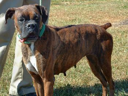
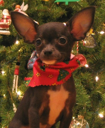
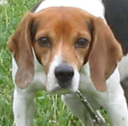
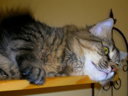
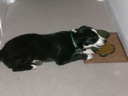

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['label'], **{})
chart

In [ ]:
#Consultamos un ejemplo de los datos
tfds.as_dataframe(datos['train'].take(5), metadatos)

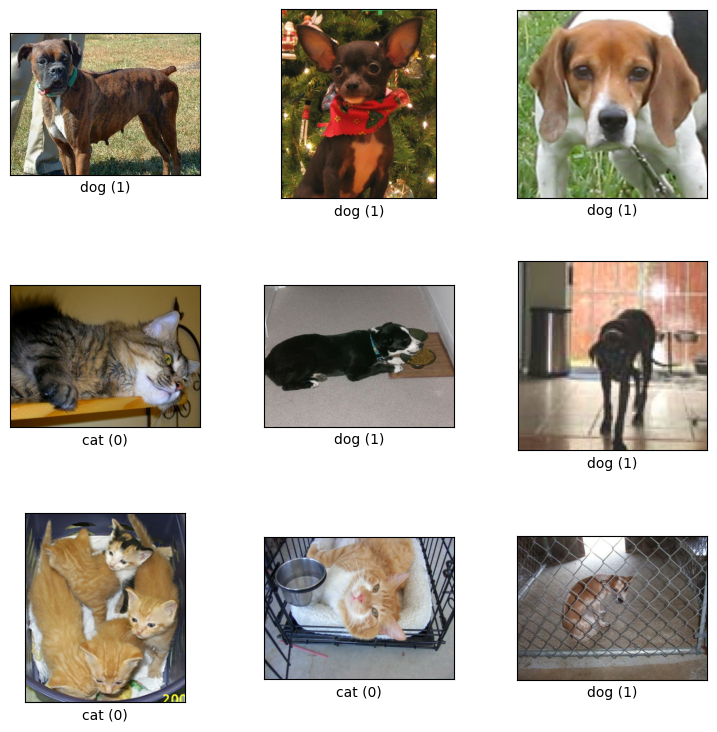

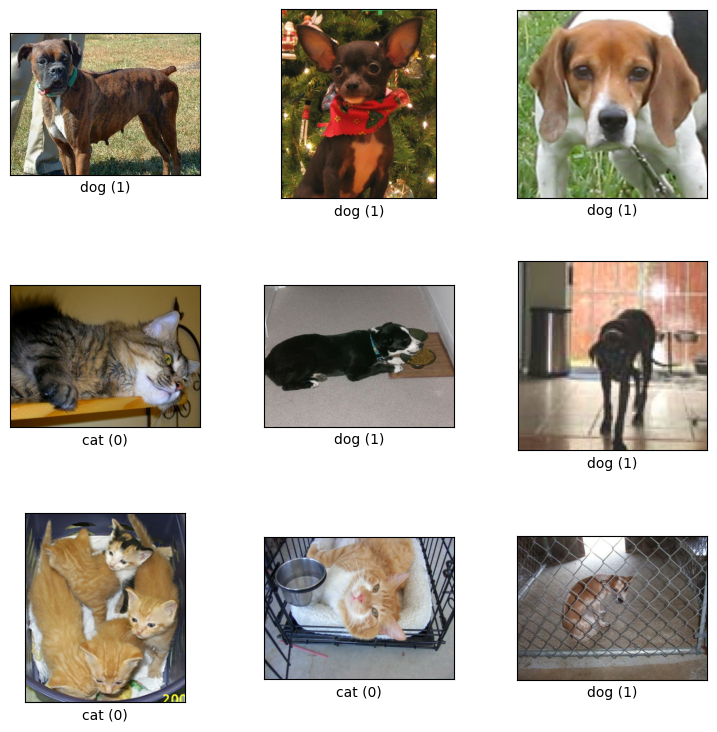

In [ ]:
#Observamos otro ejemplo de la organización de datos
tfds.show_examples(datos['train'], metadatos)

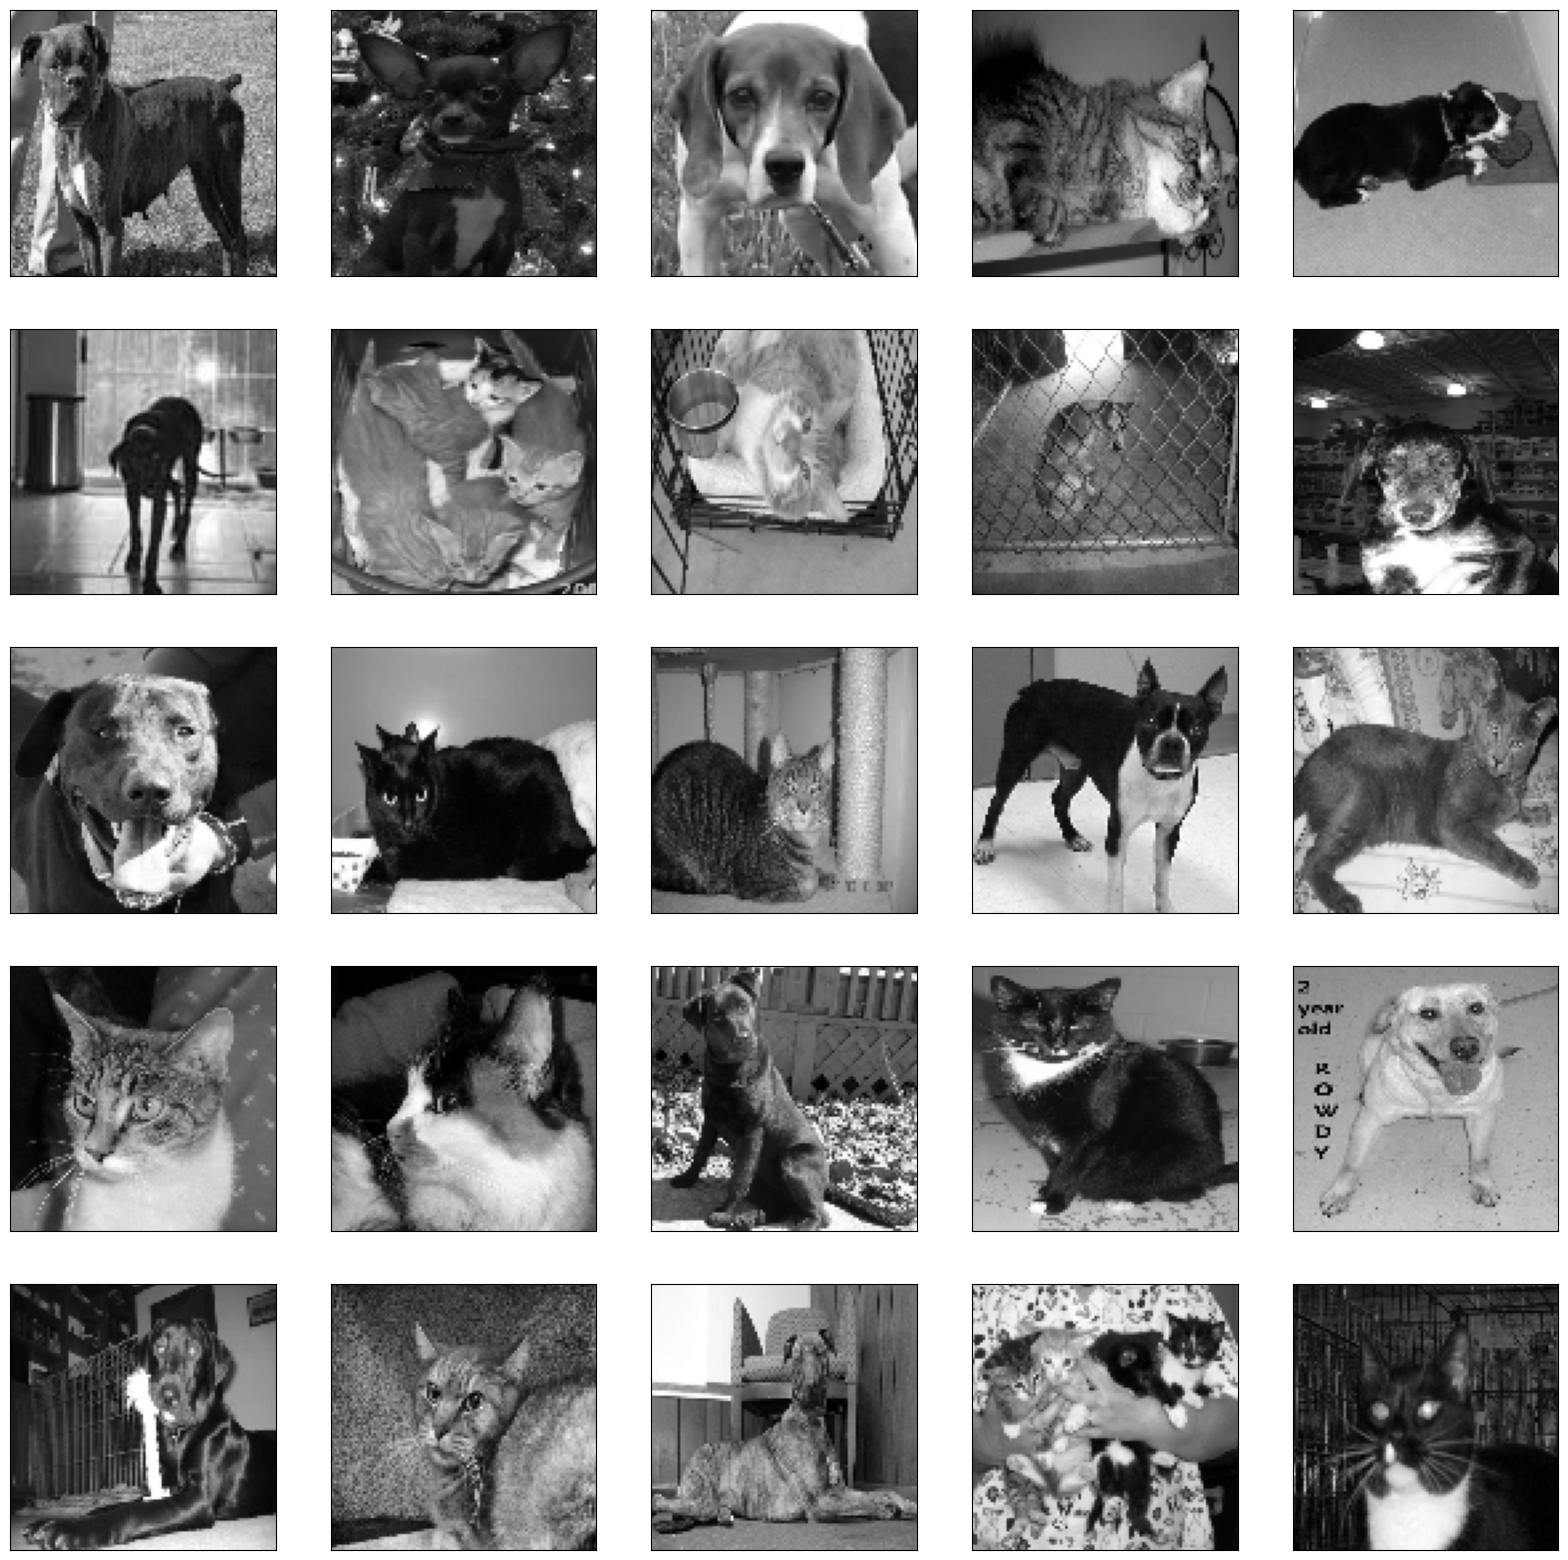

In [ ]:
#Para normalizar nuestros datos los reescalamos (100x100) y convertimos en blanco y negro
# Nota: En este caso trabajamos en blanco y negro y no en RGB por las características de los modelos presentados, pero en un segundo momento es posible trabajar en el mejoramiento de los modelos con imágenes a color.

import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [ ]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos['train']):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiamos tamaño a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
#Ver los datos del primer indice
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

23262

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
X

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 array([[[146],
         [115],
         [ 92],
         ...,
         [103],
         [ 72],
         [ 82]],
 
        [[128],
         [ 65],
         [ 77],
         ...,
         [128],
         [ 70],
         [ 97]],
 
        [[ 82],
         [ 66],
         [ 57],
         ...,
      

In [ ]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [ ]:
#Convertir etiquetas en arreglo simple
y = np.array(y)

In [ ]:
X.shape

(23262, 100, 100, 1)

In [ ]:
#Crear los modelos iniciales
#Usan sigmoid como salida (en lugar de softmax) para mostrar como podria funcionar con dicha funcion de activacion.
#Sigmoid regresa siempre datos entre 0 y 1. Realizamos el entrenamiento para al final considerar que si la respuesta se
#acerca a 0, es un gato, y si se acerca a 1, es un perro (En el contexto de la solución se entrenará como la opción original y la falsificación).

modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compilar modelos. Usar crossentropy binario ya que tenemos solo 2 opciones (perro o gato)
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100
618/618 [==============================] - 11s 7ms/step - loss: 0.7243 - accuracy: 0.5520 - val_loss: 0.6833 - val_accuracy: 0.5685
Epoch 2/100
618/618 [==============================] - 3s 5ms/step - loss: 0.6737 - accuracy: 0.5798 - val_loss: 0.6666 - val_accuracy: 0.5940
Epoch 3/100
618/618 [==============================] - 3s 4ms/step - loss: 0.6649 - accuracy: 0.5957 - val_loss: 0.6663 - val_accuracy: 0.5954
Epoch 4/100
618/618 [==============================] - 3s 5ms/step - loss: 0.6628 - accuracy: 0.5993 - val_loss: 0.6711 - val_accuracy: 0.5903
Epoch 5/100
618/618 [==============================] - 3s 5ms/step - loss: 0.6609 - accuracy: 0.6061 - val_loss: 0.6924 - val_accuracy: 0.5450
Epoch 6/100
618/618 [==============================] - 3s 5ms/step - loss: 0.6612 - accuracy: 0.6044 - val_loss: 0.6807 - val_accuracy: 0.5842
Epoch 7/100
618/618 [==============================] - 4s 7ms/step - loss: 0.6580 - accuracy: 0.6057 - val_loss: 0.6702 - val_accuracy: 0.588

In [ ]:
#Cargar la extension de tensorboard de colab
%load_ext tensorboard

In [ ]:
#Ejecutar tensorboard e indicarle que lea la carpeta "logs"
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [ ]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN])

Epoch 1/100
618/618 [==============================] - 16s 14ms/step - loss: 0.6210 - accuracy: 0.6451 - val_loss: 0.5597 - val_accuracy: 0.7186
Epoch 2/100
618/618 [==============================] - 8s 12ms/step - loss: 0.4865 - accuracy: 0.7666 - val_loss: 0.4553 - val_accuracy: 0.7920
Epoch 3/100
618/618 [==============================] - 8s 12ms/step - loss: 0.4173 - accuracy: 0.8096 - val_loss: 0.4112 - val_accuracy: 0.8097
Epoch 4/100
618/618 [==============================] - 7s 12ms/step - loss: 0.3655 - accuracy: 0.8365 - val_loss: 0.3823 - val_accuracy: 0.8252
Epoch 5/100
618/618 [==============================] - 8s 12ms/step - loss: 0.3150 - accuracy: 0.8628 - val_loss: 0.4115 - val_accuracy: 0.8135
Epoch 6/100
618/618 [==============================] - 7s 12ms/step - loss: 0.2612 - accuracy: 0.8911 - val_loss: 0.4119 - val_accuracy: 0.8327
Epoch 7/100
618/618 [==============================] - 8s 12ms/step - loss: 0.2021 - accuracy: 0.9182 - val_loss: 0.3993 - val_accuracy

In [ ]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

Epoch 1/100
618/618 [==============================] - 12s 17ms/step - loss: 0.6222 - accuracy: 0.6465 - val_loss: 0.5556 - val_accuracy: 0.7120
Epoch 2/100
618/618 [==============================] - 9s 15ms/step - loss: 0.5067 - accuracy: 0.7533 - val_loss: 0.4589 - val_accuracy: 0.7877
Epoch 3/100
618/618 [==============================] - 9s 15ms/step - loss: 0.4511 - accuracy: 0.7884 - val_loss: 0.4248 - val_accuracy: 0.8095
Epoch 4/100
618/618 [==============================] - 9s 15ms/step - loss: 0.4036 - accuracy: 0.8146 - val_loss: 0.4324 - val_accuracy: 0.7986
Epoch 5/100
618/618 [==============================] - 10s 15ms/step - loss: 0.3629 - accuracy: 0.8384 - val_loss: 0.3717 - val_accuracy: 0.8304
Epoch 6/100
618/618 [==============================] - 9s 15ms/step - loss: 0.3218 - accuracy: 0.8607 - val_loss: 0.3412 - val_accuracy: 0.8516
Epoch 7/100
618/618 [==============================] - 9s 15ms/step - loss: 0.2872 - accuracy: 0.8757 - val_loss: 0.3425 - val_accurac

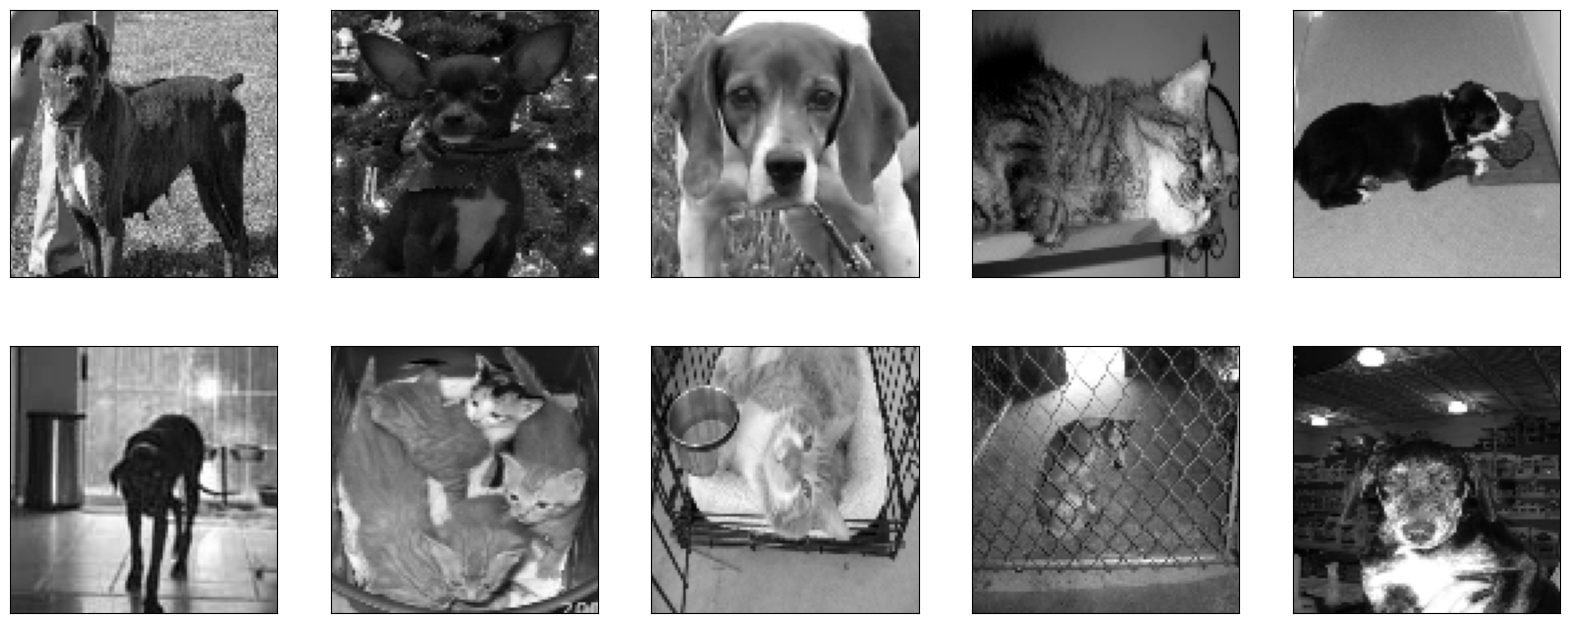

In [ ]:
#ver las imagenes de la variable X sin modificaciones por aumento de datos
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

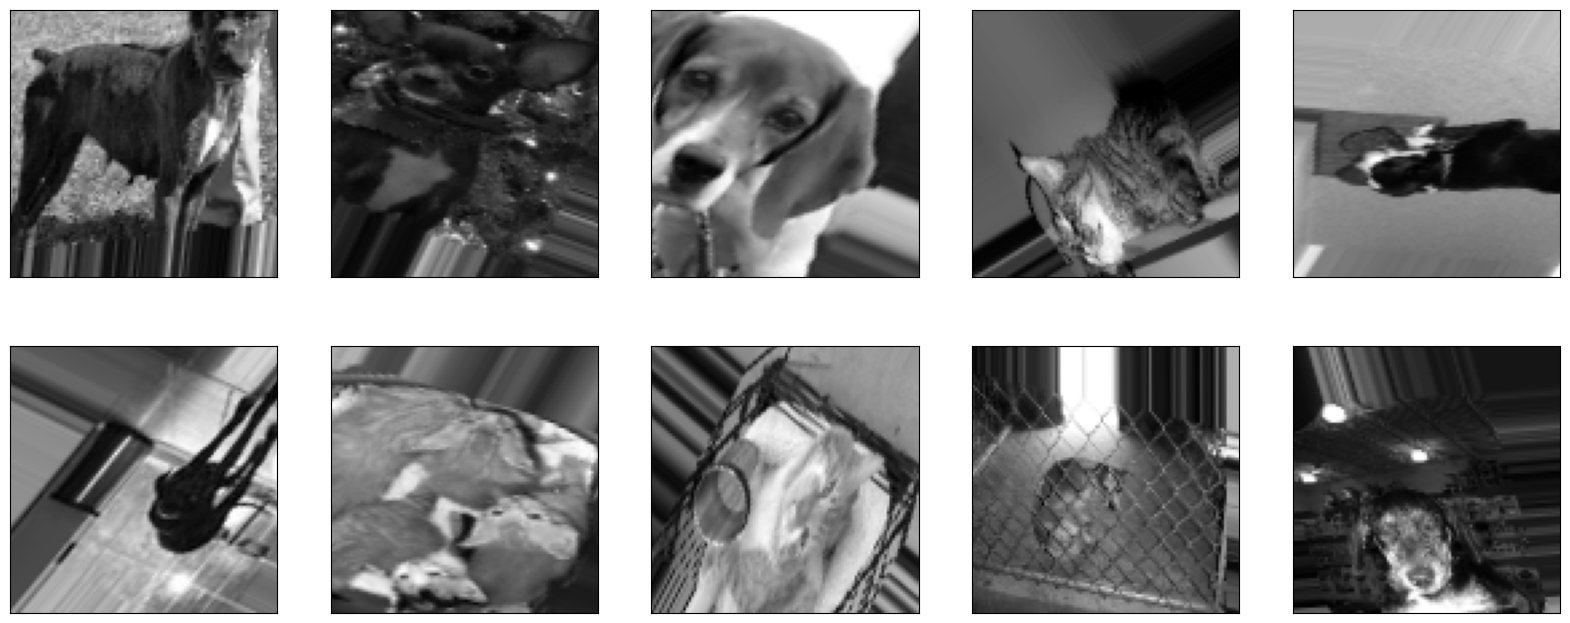

In [ ]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [ ]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [ ]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [ ]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

Epoch 1/100
616/616 [==============================] - 24s 36ms/step - loss: 0.7308 - accuracy: 0.5173 - val_loss: 0.7333 - val_accuracy: 0.5045
Epoch 2/100
616/616 [==============================] - 21s 33ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6930 - val_accuracy: 0.5143
Epoch 3/100
616/616 [==============================] - 22s 35ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6916 - val_accuracy: 0.5146
Epoch 4/100
616/616 [==============================] - 22s 36ms/step - loss: 0.6938 - accuracy: 0.5084 - val_loss: 0.6968 - val_accuracy: 0.4921
Epoch 5/100
616/616 [==============================] - 21s 33ms/step - loss: 0.6923 - accuracy: 0.5128 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 6/100
616/616 [==============================] - 23s 38ms/step - loss: 0.6935 - accuracy: 0.5019 - val_loss: 0.6918 - val_accuracy: 0.5020
Epoch 7/100
616/616 [==============================] - 22s 36ms/step - loss: 0.6923 - accuracy: 0.5089 - val_loss: 0.6932 - val_ac

KeyboardInterrupt: ignored

In [ ]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

In [ ]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

In [ ]:
modeloCNN_AD.save('perros-gatos-cnn-ad.h5')

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 37.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Suc

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida

2023-08-18 20:51:53.284394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
